<a href="https://colab.research.google.com/github/bskrish757/AIML/blob/main/CAPSTONE_PROJECT_PNEUMONIA_DETECTION_FINAL_DRAFT_MAY_JUNE_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CAPSTONE PROJECT // PNEUMONIA DETECTION // FINAL DRAFT // MAY - JUNE 2021**

## **1. Summary Of Problem Statement**

Pneumonia is an infection in one or both lungs. Bacteria, viruses, and fungi cause it. The infection causes inflammation in the air sacs in your lungs, which are called alveoli.

Pneumonia accounts for a large number of death amongst children internaltionally. It is detected through a medical process called chest radiography (CXR). This process is complex in the medical world due to numerous other lung conditions along with pneumonia hence not provding accurate results. The process is even more challenging as it has to be handled by only hihgly trained specialist doctors.

Due to this complexity we would need to devise and automate an algorithm around detecting pneumonia, through bounding boxes inorder to help physicians make better decisions or even repalce human judgement.

There are 4 datasets ;
1. Train labels - consisting of (x,y, width, height & Target column), which has 30228 rows and 5 columns in total.

2. Class info - consisting of (patientId and class column), which has  30227 rows & 2 columns in total.

3. Train Images - consisting of 26684 images

4. Test Images - consisting of 3000 images

In [1]:
pip install pydicom         # Installing the pydicom library using the pip command

     |████████████████████████████████| 1.9MB 6.7MB/s 


In [4]:
!pip install autoviz --quiet         # Installing the autoviz library for visualization

In [5]:
import os                        # Importing os library  
import pandas as pd              # To read the data set
import numpy as np               # Importing numpy library
import seaborn as sns            # For data visualization
import matplotlib.pyplot as plt  # Necessary library for plotting graphs
from glob import glob            # Importing necessary library
import tensorflow as tf          # Importing library
%matplotlib inline
sns.set(color_codes = True)

from sklearn import metrics                                # Importing metrics
from sklearn.model_selection import train_test_split       # Splitting data into train and test set
from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score, roc_auc_score, precision_score, confusion_matrix, average_precision_score
from sklearn.preprocessing import StandardScaler           # Importing to standardize the data
from sklearn.impute import SimpleImputer                   # Importing to fill in zero values in the data
from sklearn.preprocessing import LabelEncoder  
from sklearn.preprocessing import PolynomialFeatures       # Importing polynomial features library
from sklearn.decomposition import PCA                      # Importing to run pca analysis on data
from sklearn import svm                                    # Importing necessary library for model building
from sklearn.ensemble import RandomForestClassifier        # Importing necessary library for model building
from sklearn.neighbors import KNeighborsClassifier         # Importing necessary library for model building  
from sklearn import preprocessing                          # Importing preprocessing library 
from sklearn.impute import KNNImputer                      # Importing necessary library

from sklearn.model_selection import KFold, cross_val_score                                          # Importing kfold for cross validation
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV                                # Importing for hypertuning model
from sklearn.cluster import KMeans                                                                  # For KMeans cluster model building
from scipy.stats import zscore                                                                      # Import zscore library
from scipy.spatial.distance import cdist                                                            # Importing cdist functionality for elbow graph
import tensorflow                                                                                   # Importing tensorflow library
from tensorflow.keras.models import Sequential, Model                                               # Importing tensorflow library
from tensorflow.keras.utils import to_categorical                                                   # Importing tensorflow library
from tensorflow.keras import optimizers                                                             # Importing optimizers
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization, MaxPooling2D, Conv2D, Flatten, ZeroPadding2D, UpSampling2D, Reshape, SpatialDropout2D, Concatenate, Embedding, Bidirectional, GlobalAveragePooling1D, LSTM     # Importing necessary libraries 
from tensorflow.keras.applications.mobilenet import preprocess_input                                # Importing for model building
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau            # Importing for model building 
from tensorflow.keras.applications.mobilenet import MobileNet                                       # Importing for model building 
from tensorflow.keras.losses import binary_crossentropy                                             # Importing for model building
from tensorflow.keras.backend import log, epsilon                                                   # Importing necessary library for model building 
from keras.utils import np_utils                                                                    # Importing necessary library
from sklearn import svm                                                                             # Importing necessary library for model building
from sklearn.svm import SVC                                                                         # Import svc library for model building

from skimage.color import rgb2gray                                                                  # Loading color library
from sklearn.preprocessing import OneHotEncoder                                                     # Library for one hot encoding
from sklearn.metrics import confusion_matrix                                                        # Loading necessary library
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array         # Loading image generator 
from keras.preprocessing import image                                                               # Importing necessary image library
from tensorflow import keras                                                                        # Loading keras libaray 
from tensorflow.keras.optimizers import Adam, SGD                                                   # Importing optimizer library
import cv2                                                                                          # Importing necessary library
from PIL import ImageFile                                                                           # Importing image library
from tqdm import tqdm                                                                               # Importing necessary library
import time                                                                                         # Importing time library
from mpl_toolkits.axes_grid1 import ImageGrid                                                       # Importing necessary image library
from PIL import Image                                                                               # Importing image library
from autoviz.AutoViz_Class import AutoViz_Class                                                     # Importing necessary library

import re                                                                   # Importing regular expression library 
import nltk                                                                 # Import necessary library 
from nltk.corpus import stopwords                                           # Importing necessary library 
from sklearn.feature_extraction.text import CountVectorizer                 # Importing count library 
from sklearn.preprocessing import MultiLabelBinarizer                       # Imorting necessary library 
import json                                                                 # Importing json to import file 
import urllib                                                               # Importing necessary library
from tensorflow.keras.preprocessing.text import Tokenizer                   # Importing tokenizer to tokenize words
from tensorflow.keras.preprocessing.sequence import pad_sequences           # Importing necessary library
from wordcloud import WordCloud                                             # Importing necessary library
import pydicom as dcm                                                       # Importing necessary library
from matplotlib.patches import Rectangle                                    # Importing necessary Library 
import imgaug as ia                                                         # Importing necessary Library 
from imgaug import augmenters as iaa                                        # Importing necessary Library 

# Download Kaggle

Steps to download:
1. Create an acccout in https://www.kaggle.com/ with the account you signed in to google colab,drive
2. Go to account settings --> API -->Create New API Token
3. A kaggle.json file will be downloaded, copy it to the google drive location
4. and use it in the below steps wherever specified

In [7]:
!pip install kaggle

In [8]:
#Make a directory for Kaggle
!mkdir .kaggle

In [9]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [11]:
#Copy kaggle.json file which 
!cp '/gdrive/My Drive/Colab Notebooks/kaggle.json' /content/.kaggle/kaggle.json

In [12]:
#Check if json file is there
!ls -l /content/.kaggle

total 4
-rw------- 1 root root 65 Jun 14 17:11 kaggle.json


In [13]:
!mkdir ~/.kaggle


In [14]:
!cp /content/.kaggle/kaggle.json  ~/.kaggle

In [15]:
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [16]:
!chmod 600 /root/.kaggle/kaggle.json

In [17]:
#To Avoid the error "Warning: Looks like you're using an outdated API Version, please consider updating (server 1.5.12 / client 1.5.4)" 
#and also to download dataset properly the below command is neccessary
!pip install --upgrade --force-reinstall --no-deps kaggle --quiet

     |████████████████████████████████| 61kB 5.1MB/s 


# Download RSNA competition dataset

In [18]:
!kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              229KB  2021-06-14 06:30:31           7473        656  1.0              
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           4540        372  0.9375           
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           1538        133  1.0              
dhruvildave/wikibooks-dataset                               Wikibooks Dataset             

In [19]:
#Download data from Kaggle for RSNA PNEUMONIA DETECTION and copy it to /content folder
!kaggle competitions download -c rsna-pneumonia-detection-challenge -p /content

100% 3.65G/3.66G [01:08<00:00, 40.0MB/s]
100% 3.66G/3.66G [01:08<00:00, 57.6MB/s]


In [20]:
!unzip -q rsna-pneumonia-detection-challenge.zip 

In [21]:
!ls -l

total 3845372
-rw-r--r-- 1 root root         55 Dec 11  2019 'GCP Credits Request Link - RSNA.txt'
-rw-r--r-- 1 root root 3932287530 Jun 14 17:12  rsna-pneumonia-detection-challenge.zip
drwxr-xr-x 1 root root       4096 Jun  1 13:40  sample_data
-rw-r--r-- 1 root root    1647396 Dec 11  2019  stage_2_detailed_class_info.csv
-rw-r--r-- 1 root root     159027 Dec 11  2019  stage_2_sample_submission.csv
drwxr-xr-x 2 root root     212992 Jun 14 17:12  stage_2_test_images
drwxr-xr-x 2 root root    1843200 Jun 14 17:14  stage_2_train_images
-rw-r--r-- 1 root root    1490034 Dec 11  2019  stage_2_train_labels.csv


In [22]:
!ls  stage_2_train_images/ | wc -l

26684


In [23]:
!ls  stage_2_test_images/ | wc -l

3000


## **2. Pre-Processing, Data Visualization, EDA**





### **2.1 Exploring the given Data files, classes and images of different classes.**

In [ ]:
# Setting the drive path 

path  = '/content/drive/MyDrive/My Files/AIML Workbooks/'

In [24]:
# Loading train label and class info csv files

train_labels = pd.read_csv('stage_2_train_labels.csv')
class_info = pd.read_csv('stage_2_detailed_class_info.csv')

In [26]:
class_info.head(5)       # Checking top five rows and columns

patientId                         class
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6  No Lung Opacity / Not Normal
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd  No Lung Opacity / Not Normal
2  00322d4d-1c29-4943-afc9-b6754be640eb  No Lung Opacity / Not Normal
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5                        Normal
4  00436515-870c-4b36-a041-de91049b9ab4                  Lung Opacity

In [27]:
class_info.isnull().apply(pd.value_counts)        # Checking to see the presence of null values 

patientId  class
False      30227  30227

In [28]:
class_info.shape        # Shape of the dataframe

(30227, 2)

In [29]:
class_info.size         # Size of the dataframe

60454

In [30]:
class_info.info()       # Overall info on the dataframe 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   patientId  30227 non-null  object
 1   class      30227 non-null  object
dtypes: object(2)
memory usage: 472.4+ KB


We can observe from the above data preparatory analysis, that class_info file is clear and has no null values to deal with hence we can proceed further. 

In [31]:
train_labels.head(5)      # Checking top five rows and columns

patientId      x      y  width  height  Target
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN       0
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd    NaN    NaN    NaN     NaN       0
2  00322d4d-1c29-4943-afc9-b6754be640eb    NaN    NaN    NaN     NaN       0
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5    NaN    NaN    NaN     NaN       0
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1

In [32]:
train_labels.shape            # Shape of the dataset

(30227, 6)

In [33]:
train_labels.size             # Size of the dataset

181362

In [34]:
train_labels.isnull().apply(pd.value_counts)          # Checking to see the presence of null values 

patientId      x      y  width  height   Target
False    30227.0   9555   9555   9555    9555  30227.0
True         NaN  20672  20672  20672   20672      NaN

In [35]:
train_labels.isnull().sum()

patientId        0
x            20672
y            20672
width        20672
height       20672
Target           0
dtype: int64

We can observe that our dataset has about (20672) null values 

In [36]:
train_labels.info()           # Overall info on the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patientId  30227 non-null  object 
 1   x          9555 non-null   float64
 2   y          9555 non-null   float64
 3   width      9555 non-null   float64
 4   height     9555 non-null   float64
 5   Target     30227 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 1.4+ MB


We can observe from the above data preparatory analysis, that train_labels file has missing values and hence we need to treat it inorder to avoid it with hampering our overall model accuracy.

In [37]:
# Analyse patientIds and their corresponding bounding boxes. 

bounding_box = train_labels.groupby(['patientId']).size().to_frame('total_boxes').reset_index()

In [38]:
bounding_box.groupby(['total_boxes']).size().to_frame('NumberOfPatients').reset_index()

total_boxes  NumberOfPatients
0            1             23286
1            2              3266
2            3               119
3            4                13

In [39]:
# Visualizing through a dataframe the percentage loss of information with current exisiting null values present

def count_miss_data(data_df):
    total = data_df.isnull().sum().sort_values(ascending = False)
    percent = (data_df.isnull().sum()/data_df.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [40]:
count_miss_data(train_labels)

Total    Percent
height     20672  68.389188
width      20672  68.389188
y          20672  68.389188
x          20672  68.389188
Target         0   0.000000
patientId      0   0.000000

We currently have (20672) null values present. If we drop this information we can observe that we would be losing about (68.38%) which could hamper our overall analysis.

### **2.2 Visualization of different classes**

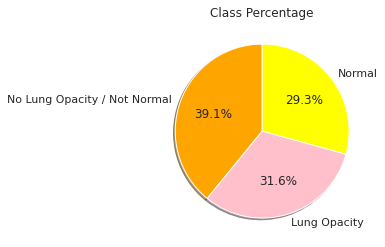

In [41]:
# Visualizing and checking through a pie chart class distribution 

class_df = class_info['class'].value_counts()

labels = (np.array(class_df.index))
size = (np.array(class_df/class_df.sum()*100))
colors = ['orange','pink','yellow']
plt.pie(size, labels = labels, colors= colors, autopct = '%1.1f%%', startangle = 90, shadow = True)
plt.title('Class Percentage')
plt.show()

We can observe from the above visual analysis that :

1. 29.3% people are (Normal)
2. 39.1% people have (No Lung Opacity/Not Normal)
3. 31.6% people have (Lung Opacity) 

From this we can guage that though there are two target classes(Normal, No Lung Opacity / Not Normal & Lung Opacity) i have visually displayed the data into three to showcase what percentage fall under each category. Reason to have done that is patients falling under "No Lung Opacity / Not Normal" could either mean they have no trace of the infection or they do, is why they are borderline cases.



In [42]:
# Merging both datasets (Check on patient id)

train_df = train_labels.merge(class_info, how = 'inner')
train_df.sample(5)

patientId  ...                         class
8617   4eb0d72a-4676-49da-a0e1-321822fb9139  ...                        Normal
1684   112ef47f-9c95-442d-8e12-35755033f034  ...  No Lung Opacity / Not Normal
25403  b95d289f-8019-4491-8f90-39a55d321c37  ...                  Lung Opacity
3513   327a4509-9929-41b6-9e3d-d2bd90117d90  ...  No Lung Opacity / Not Normal
11250  624a95b9-354b-415e-8bcc-382c6510469d  ...                  Lung Opacity

[5 rows x 7 columns]

In [43]:
train_df.shape           # Checking train labels and class info merged dataframe shape

(37629, 7)

Total number of records are 37629 hence we need to find out those records which are duplicates

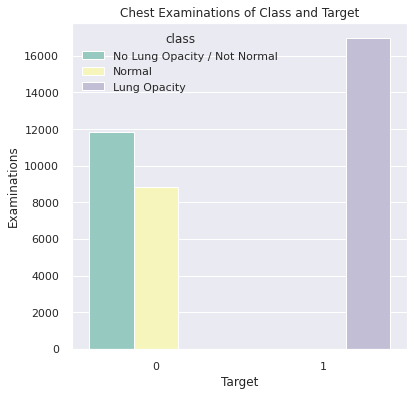

In [44]:
# Plotting the number of examinations for each class detected, grouped by Target value.

fig, ax = plt.subplots(nrows = 1, figsize=(6,6))
ids = train_df.groupby('Target')['class'].value_counts()
df = pd.DataFrame(data = {'Examinations' : ids}, index = ids.index).reset_index()
sns.barplot(ax = ax, x = 'Target', y = 'Examinations', hue = 'class', palette = 'Set3', data = df)
plt.title('Chest Examinations of Class and Target')
plt.show()

All chest examinations with ('Target = 1' are Pathology Detected) associated with (class: Lung Opacity). The chest examinations with ('Target = 0' are Not Pathology Detected) are either of (class: Normal or class: No Lung Opacity / Not Normal).

<Figure size 432x288 with 0 Axes>

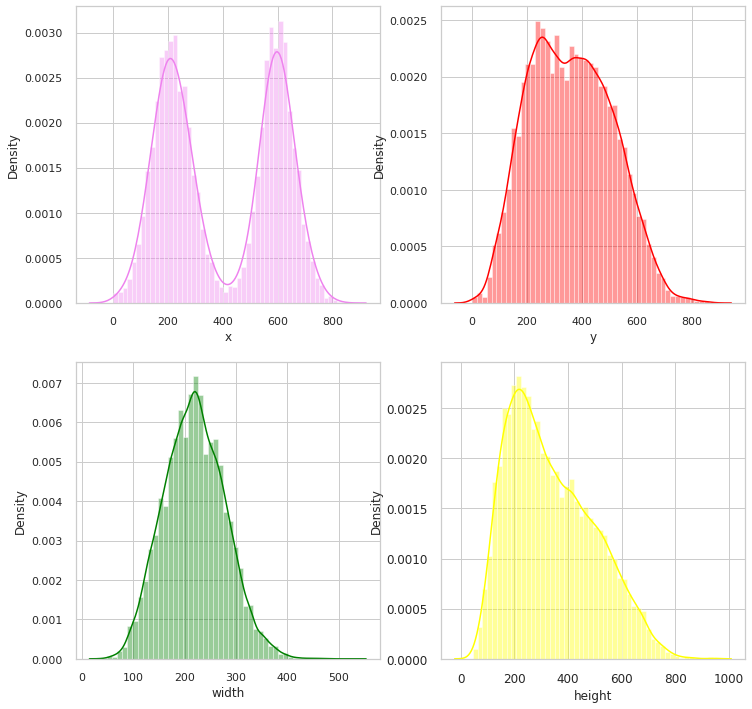

In [45]:
# For the class Lung Opacity, corresponding to values of Target = 1, we plot the density of x, y, width and height.

target1 = train_df[train_df['Target']==1]
sns.set_style('whitegrid')

plt.figure()
fig, ax = plt.subplots(2,2,figsize=(12,12))
sns.distplot(target1['x'],kde=True,bins=50, color="violet", ax=ax[0,0])
sns.distplot(target1['y'],kde=True,bins=50, color="red", ax=ax[0,1])
sns.distplot(target1['width'],kde=True,bins=50, color="green", ax=ax[1,0])
sns.distplot(target1['height'],kde=True,bins=50, color="yellow", ax=ax[1,1])
locs, labels = plt.xticks()
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

We can observe from the the above visualization of the train_labels data parameters :

1. 'x' is a bi-modal distribution 
2. 'y' is right skewed which means that mode is at its heights away from the mean and the median.
3. 'width' seems to form a normal distribution with no skewness.
4. 'height' also seems to be right skewed, which states mode is highest in comparison to mean and median.

### **2.3 Analysis from the visualization of different classes**

In [46]:
train_images_path = 'stage_2_train_images'
test_images_path = 'stage_2_test_images'

In [53]:
# Setting the path to load the train and test images 

train_images_count = !ls stage_2_train_images | wc -l
test_images_count = !ls stage_2_test_images | wc -l

In [54]:
# Loading & finding the number of images present in each dataset

print('Number of images in training dataset:', train_images_count)
print('Number of images in testing dataset:', test_images_count)

Number of images in training dataset: ['26684']
Number of images in testing dataset: ['3000']


In [55]:
# Analyse patientIds and their corresponding bounding boxes after combining datasets, class_info & train_labels

bounding_box = train_df.groupby(['patientId']).size().to_frame('total_boxes').reset_index()

In [56]:
bounding_box.groupby(['total_boxes']).size().to_frame('NumberOfPatients').reset_index()

total_boxes  NumberOfPatients
0            1             23286
1            4              3266
2            9               119
3           16                13

Number of bounding boxes based on patient scans, after combining both the class_info file and the train_labels file:

1. 23286 patients i.e. 87% of patients have one bounding box.

2. 3266 patients i.e 12% have 4 bounding boxes. 

3. 132 patients i.e 1% have more than 4 bounding boxes.

In [59]:
# Process the dicom metadata information, specifying different categories available 

sampleid = list(train_df[:3].T.to_dict().values())[0]['patientId']
sampleid = sampleid + '.dcm'
dicom_path = os.path.join('stage_2_train_images', sampleid)
dicom_dataset = dcm.read_file(dicom_path)
dicom_dataset

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 202
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.28530.1517874485.775526
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.28530.1517874485.775526
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time      

In [60]:
# Defining a code to show patients with lung opacity

def show_dicom_images(data):
    img_data = list(data.T.to_dict().values())
    f, ax = plt.subplots(3,3, figsize=(16,18))

    # Defining the image dataset folder
    for i,data_row in enumerate(img_data):
        patientimg = data_row['patientId']+'.dcm'
        imagepath = os.path.join('stage_2_train_images', patientimg)
        data_row_img_data = dcm.read_file(imagepath)
        
        # Loading certian metadata info as image title 
        modality = data_row_img_data.Modality     # Defining stat from metadata info
        age = data_row_img_data.PatientAge        # Defining stat from metadata info
        sex = data_row_img_data.PatientSex        # Defining stat from metadata info
        data_row_img = dcm.dcmread(imagepath)
        ax[i//3, i%3].imshow(data_row_img.pixel_array, cmap = plt.cm.bone) 
        ax[i//3, i%3].axis('off')
        ax[i//3, i%3].set_title('ID: {}\nModality: {} Age: {} Sex: {} Target: {}\nClass: {}\nWindow: {}:{}:{}:{}'.format(
                data_row['patientId'],
                modality, age, sex, data_row['Target'], data_row['class'], 
                data_row['x'],data_row['y'],data_row['width'],data_row['height']))
    
    plt.show()

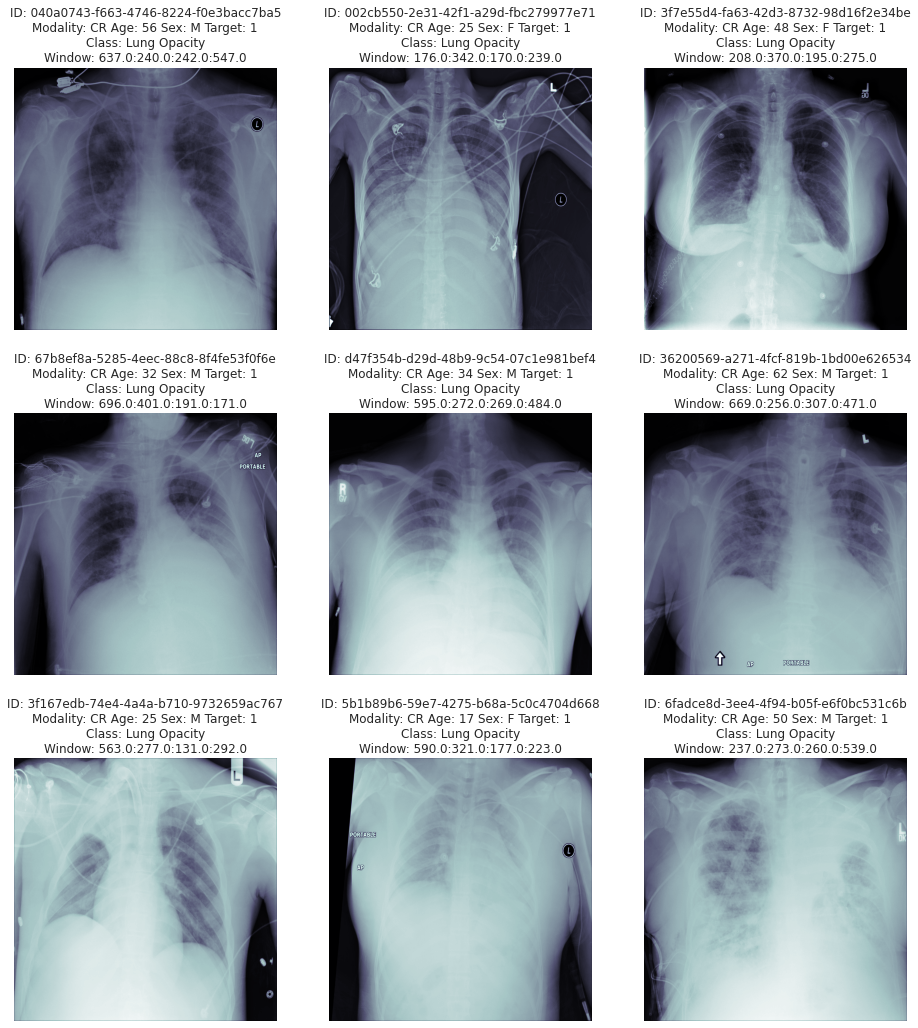

In [61]:
# Visualizing through x-ray images patients with lung opacity 

show_dicom_images(train_df[train_df['Target'] == 1].sample(9))

In [62]:
# Defining a code to show patients with lung opacity along with bounding boxes around the area

def show_dicom_images_with_boxes(data):
    img_data = list(data.T.to_dict().values())
    f, ax = plt.subplots(3,3, figsize=(16,18))

    # Defining the image dataset folder
    for i,data_row in enumerate(img_data):
        patientimg = data_row['patientId']+'.dcm'
        imagepath = os.path.join('stage_2_train_images', patientimg)
        data_row_img_data = dcm.read_file(imagepath)

        # Loading certain metadata info as title of the image
        modality = data_row_img_data.Modality     # Defining stat from metadata info
        age = data_row_img_data.PatientAge        # Defining stat from metadata info
        sex = data_row_img_data.PatientSex        # Defining stat from metadata info
        data_row_img = dcm.dcmread(imagepath)
        ax[i//3, i%3].imshow(data_row_img.pixel_array, cmap = plt.cm.bone) 
        ax[i//3, i%3].axis('off')
        ax[i//3, i%3].set_title('ID: {}\nModality: {} Age: {} Sex: {} Target: {}\nClass: {}'.format(
                data_row['patientId'],modality, age, sex, data_row['Target'], data_row['class']))
        
        # Adding bouding boxes to images in the dataframe to show infected area of patients lungs
        rows = train_df[train_df['patientId'] == data_row['patientId']]
        box_data = list(rows.T.to_dict().values())
        for j, row in enumerate(box_data):
            ax[i//3, i%3].add_patch(Rectangle(xy = (row['x'], row['y']),
                        width = row['width'],height = row['height'], 
                        linewidth = 2, edgecolor = 'r', facecolor = 'none', alpha = 1))   
    plt.show()

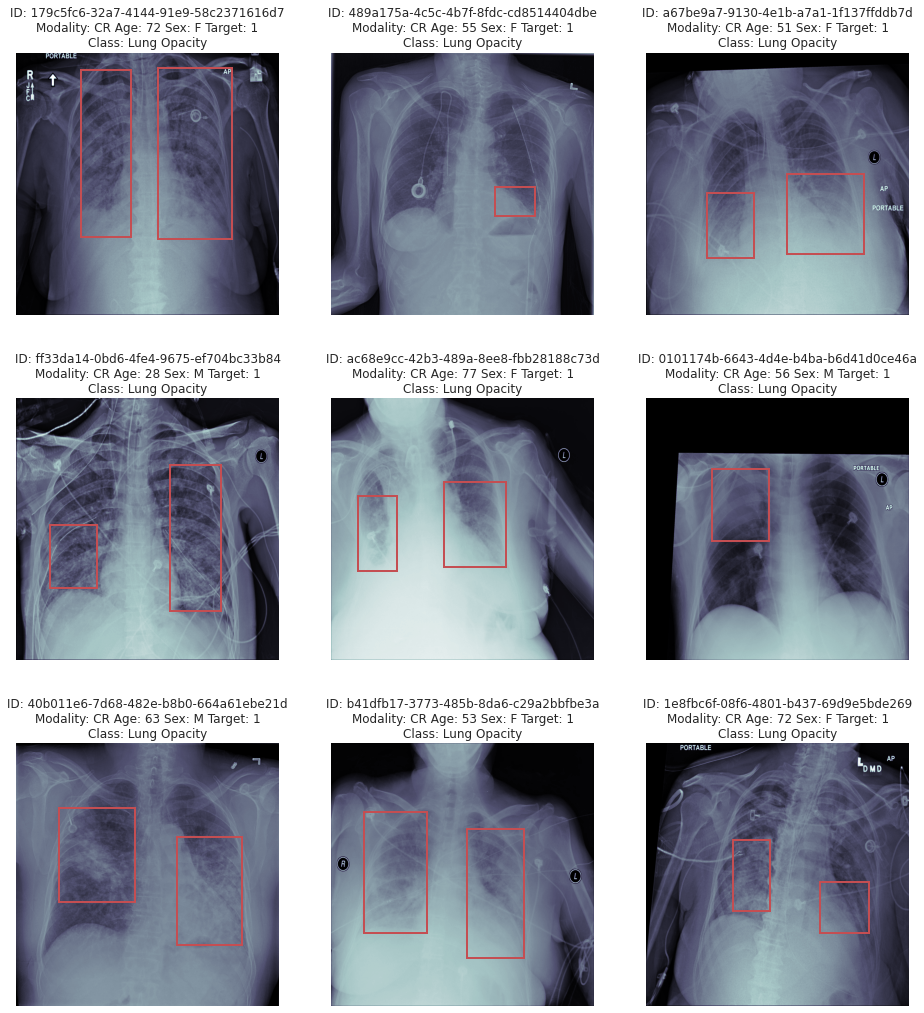

In [63]:
# Visualizing through images, patients with lung opacity along with bounding boxes showing the location.

show_dicom_images_with_boxes(train_df[train_df['Target']==1].sample(9))

From the above visualization we can observe that some patients have 3 bounding boxes, compared to others having 2 & 1 respectively. This shows the possibility of some patients having more infected areas than others.

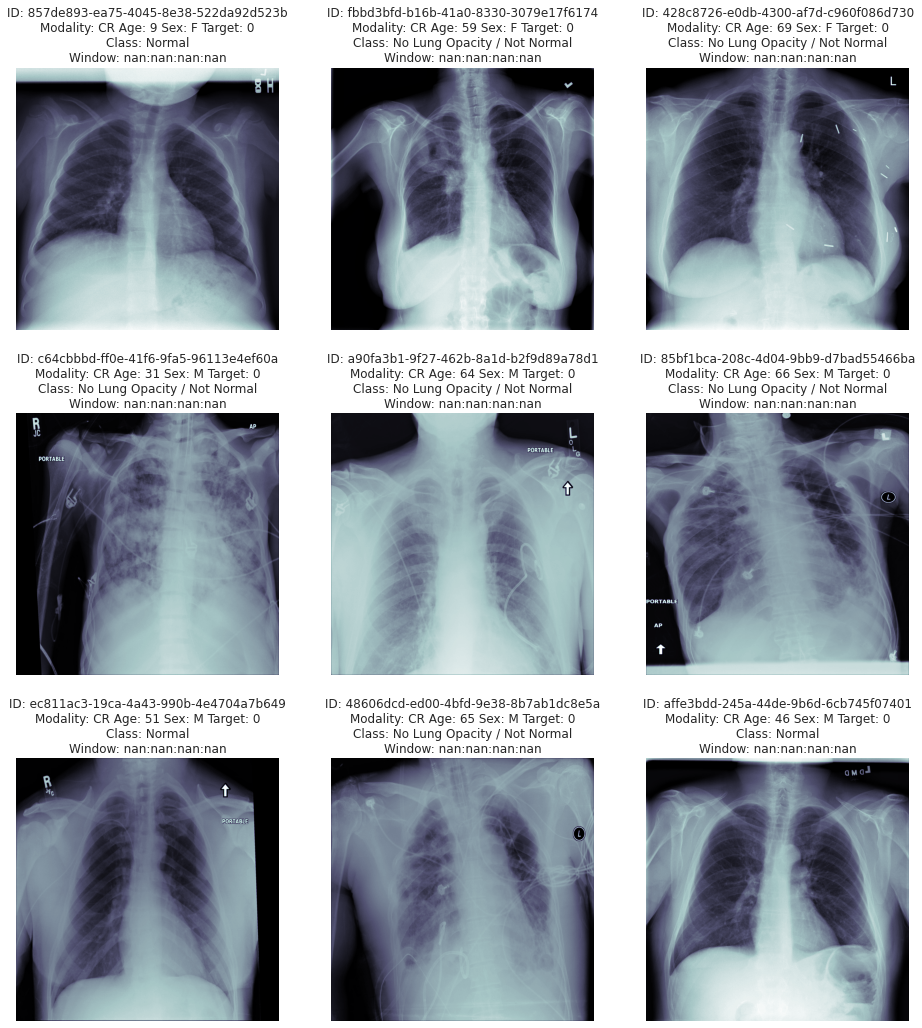

In [64]:
# Visualizing through images, patients with no lung opacity/not normal

show_dicom_images(train_df[train_df['Target'] == 0].sample(9))

## **2.4 Dealing with missing values**

In [65]:
# Display the patientId which have outliers in there data and
# store them in a different data frame

h1 =  train_df['height'].quantile(0.25)
h3 = train_df['height'].quantile(0.75)
IQR_H = h3 - h1
print(f"The highest whisker value of Height is : {h3 + IQR_H*1.5}")

w1 =  train_df['width'].quantile(0.25)
w3 = train_df['width'].quantile(0.75)
IQR_W = w3 - w1
print(f"The highest whisker value of weight is : {w3 + IQR_W*1.5}")

y1 =  train_df['y'].quantile(0.25)
y3 = train_df['y'].quantile(0.75)
IQR_Y = y3 - y1
print(f"The highest whisker value of y is : {y3 + IQR_Y*1.5}")

The highest whisker value of Height is : 815.0
The highest whisker value of weight is : 380.5
The highest whisker value of y is : 815.5


In [66]:
print("The number of patients having bounding box heights treated as outliers = ", train_df[(train_df['height'] > h3+1.5*IQR_H) | (train_df['height'] < h1 -1.5*IQR_H)].shape[0])
print("The number of patients having bounding box width treated as outliers = ", train_df[(train_df['width'] > w3+1.5*IQR_W) | (train_df['width'] < w1 -1.5*IQR_W)].shape[0])
print("The number of patients having bounding box y co-ordinate treated as outliers = ", train_df[(train_df['y'] > y3+1.5*IQR_Y) | (train_df['y'] < y1 -1.5*IQR_Y)].shape[0])

The number of patients having bounding box heights treated as outliers =  20
The number of patients having bounding box width treated as outliers =  81
The number of patients having bounding box y co-ordinate treated as outliers =  15


We cannot change the width height or y coordinate directly, so we will observe the output of some of these and check if the bounding boxes are not properly defined and remove if required

In [67]:
train_height_outliers = train_df[train_df['height'] > h3+1.5*IQR_H]
train_height_outliers

patientId      x  ...  Target         class
5364   3accdbb1-0300-4065-8757-94eb3dd213c3  123.0  ...       1  Lung Opacity
5365   3accdbb1-0300-4065-8757-94eb3dd213c3  123.0  ...       1  Lung Opacity
5366   3accdbb1-0300-4065-8757-94eb3dd213c3  621.0  ...       1  Lung Opacity
5367   3accdbb1-0300-4065-8757-94eb3dd213c3  621.0  ...       1  Lung Opacity
5793   3ca6661a-ffbd-4d4d-b49b-c96cfd218307  549.0  ...       1  Lung Opacity
5794   3ca6661a-ffbd-4d4d-b49b-c96cfd218307  549.0  ...       1  Lung Opacity
6185   3e62e51c-befb-4a66-b28e-fc469b19e4a8  148.0  ...       1  Lung Opacity
6186   3e62e51c-befb-4a66-b28e-fc469b19e4a8  148.0  ...       1  Lung Opacity
6187   3e62e51c-befb-4a66-b28e-fc469b19e4a8  620.0  ...       1  Lung Opacity
6188   3e62e51c-befb-4a66-b28e-fc469b19e4a8  620.0  ...       1  Lung Opacity
17093  893b6861-0bfc-4e9f-94d4-3a967dda4223  156.0  ...       1  Lung Opacity
17094  893b6861-0bfc-4e9f-94d4-3a967dda4223  156.0  ...       1  Lung Opacity
18633  92a2dfab-f33a-4324-953a-afe96680c541  520.0  ...       1  Lung Opacity
18634  92a2dfab-f33a-4324-953a-afe96680c541  520.0  ...       1  Lung Opacity
18761  9379cd1d-a032-4fcc-8ffe-b06e221dec96  543.0  ...       1  Lung Opacity
18762  9379cd1d-a032-4fcc-8ffe-b06e221dec96  543.0  ...       1  Lung Opacity
21067  a3ac5fe9-431c-4c10-8691-d0d26e6a0edd  180.0  ...       1  Lung Opacity
24508  b524542b-1779-4871-9574-7ff72b296503  589.0  ...       1  Lung Opacity
24509  b524542b-1779-4871-9574-7ff72b296503  589.0  ...       1  Lung Opacity
26226  bcbb2132-0a68-4baa-b264-9c9e6567e35b  550.0  ...       1  Lung Opacity

[20 rows x 7 columns]

In [68]:
train_width_outliers = train_df[train_df['width'] > w3+1.5*IQR_W]
train_width_outliers

patientId      x  ...  Target         class
280    05d4d725-02a2-4c90-8ef8-463217889ba8  518.0  ...       1  Lung Opacity
281    05d4d725-02a2-4c90-8ef8-463217889ba8  518.0  ...       1  Lung Opacity
560    074f8729-c5ea-4830-8249-9a04208eab5e   13.0  ...       1  Lung Opacity
561    074f8729-c5ea-4830-8249-9a04208eab5e   13.0  ...       1  Lung Opacity
562    074f8729-c5ea-4830-8249-9a04208eab5e  611.0  ...       1  Lung Opacity
...                                     ...    ...  ...     ...           ...
25174  b82d06aa-4036-4ad0-acf1-99b127f2ce17  482.0  ...       1  Lung Opacity
25175  b82d06aa-4036-4ad0-acf1-99b127f2ce17  482.0  ...       1  Lung Opacity
29288  d094558c-2614-4d0b-b142-a9de0864f572  110.0  ...       1  Lung Opacity
29289  d094558c-2614-4d0b-b142-a9de0864f572  110.0  ...       1  Lung Opacity
29892  d51472ae-a24e-4340-b468-54c883a12c41  602.0  ...       1  Lung Opacity

[75 rows x 7 columns]

In [69]:
train_y_outliers = train_df[train_df['y'] > y3+1.5*IQR_Y]
train_y_outliers

patientId      x  ...  Target         class
77     01be392f-a46d-4aef-a57e-9cd1a80dd47e  175.0  ...       1  Lung Opacity
78     01be392f-a46d-4aef-a57e-9cd1a80dd47e  175.0  ...       1  Lung Opacity
3433   32408669-c137-4e8d-bd62-fe8345b40e73  273.0  ...       1  Lung Opacity
3434   32408669-c137-4e8d-bd62-fe8345b40e73  273.0  ...       1  Lung Opacity
3435   32408669-c137-4e8d-bd62-fe8345b40e73  273.0  ...       1  Lung Opacity
3436   32408669-c137-4e8d-bd62-fe8345b40e73  273.0  ...       1  Lung Opacity
4491   36c50ee5-7885-4c34-8f24-829f85cea256  583.0  ...       1  Lung Opacity
4492   36c50ee5-7885-4c34-8f24-829f85cea256  583.0  ...       1  Lung Opacity
6419   3f4eae54-fb2b-4616-a32f-c42f7df570b7  135.0  ...       1  Lung Opacity
6420   3f4eae54-fb2b-4616-a32f-c42f7df570b7  135.0  ...       1  Lung Opacity
13636  729f2aa0-9564-4228-b516-1d8d4be8bb55  574.0  ...       1  Lung Opacity
13666  72dc0bc2-8c6a-4214-b06f-862e9e8444bd  586.0  ...       1  Lung Opacity
16341  847f25e9-6983-4c5f-a1e6-f3629557f1a3   75.0  ...       1  Lung Opacity
16342  847f25e9-6983-4c5f-a1e6-f3629557f1a3   75.0  ...       1  Lung Opacity
32408  e821a416-aed0-411d-ab8a-7813185384b9   39.0  ...       1  Lung Opacity

[15 rows x 7 columns]

In [70]:
# Example of same patient ID and there respective bounding boxes,
# which either could be duplicate or could mean a patient has multiple bounding boxes which means multiple infected areas

train_df[train_df['patientId'] == '32408669-c137-4e8d-bd62-fe8345b40e73']

patientId      x  ...  Target         class
3433  32408669-c137-4e8d-bd62-fe8345b40e73  273.0  ...       1  Lung Opacity
3434  32408669-c137-4e8d-bd62-fe8345b40e73  273.0  ...       1  Lung Opacity
3435  32408669-c137-4e8d-bd62-fe8345b40e73  273.0  ...       1  Lung Opacity
3436  32408669-c137-4e8d-bd62-fe8345b40e73  273.0  ...       1  Lung Opacity
3437  32408669-c137-4e8d-bd62-fe8345b40e73  702.0  ...       1  Lung Opacity
3438  32408669-c137-4e8d-bd62-fe8345b40e73  702.0  ...       1  Lung Opacity
3439  32408669-c137-4e8d-bd62-fe8345b40e73  702.0  ...       1  Lung Opacity
3440  32408669-c137-4e8d-bd62-fe8345b40e73  702.0  ...       1  Lung Opacity
3441  32408669-c137-4e8d-bd62-fe8345b40e73  300.0  ...       1  Lung Opacity
3442  32408669-c137-4e8d-bd62-fe8345b40e73  300.0  ...       1  Lung Opacity
3443  32408669-c137-4e8d-bd62-fe8345b40e73  300.0  ...       1  Lung Opacity
3444  32408669-c137-4e8d-bd62-fe8345b40e73  300.0  ...       1  Lung Opacity
3445  32408669-c137-4e8d-bd62-fe8345b40e73  706.0  ...       1  Lung Opacity
3446  32408669-c137-4e8d-bd62-fe8345b40e73  706.0  ...       1  Lung Opacity
3447  32408669-c137-4e8d-bd62-fe8345b40e73  706.0  ...       1  Lung Opacity
3448  32408669-c137-4e8d-bd62-fe8345b40e73  706.0  ...       1  Lung Opacity

[16 rows x 7 columns]

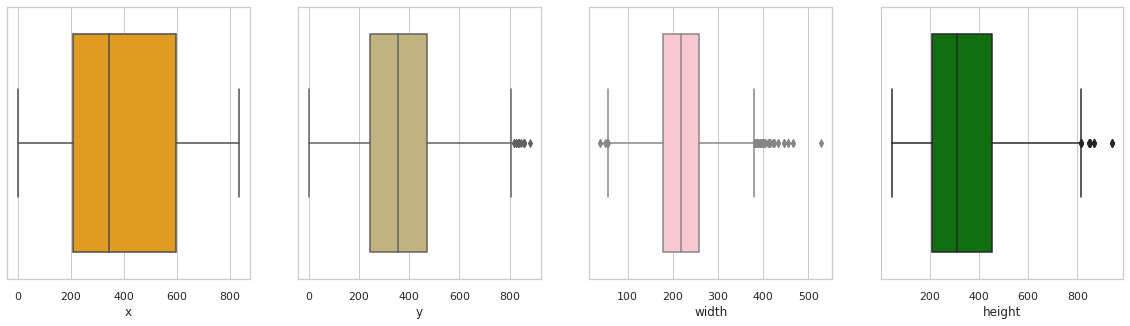

In [71]:
# Visual analysis through box plot to check number of outliers 
# We have to decide whether we need to really change them and bring back to mean position or any other quartile value
# If we do that then our bounding boxes which capture the opacity may go wrong, so we can observe some example bounding boxes on the training images which are treated as outliers

fig, ax = plt.subplots(1,4)
fig.set_size_inches(20,5)

sns.boxplot(x = 'x', data = train_df, color = 'orange', ax = ax[0])
sns.boxplot(x = 'y', data = train_df, color = 'y', ax = ax[1])
sns.boxplot(x = 'width', data = train_df, color = 'pink', ax = ax[2])
sns.boxplot(x = 'height', data = train_df, color = 'green', ax = ax[3])

We can observe from the above graphical visualization that height, width and y have outliers present within them. This could mean that the bounding boxes are relatively larger through the CXR scans, hence detecting are larger area of pneumonia than there actually is.

In [72]:
train_df.isnull().sum()       # Checking presence of null values 

patientId        0
x            20672
y            20672
width        20672
height       20672
Target           0
class            0
dtype: int64

In [73]:
merge_df = train_df.drop(columns = ["patientId", "class"])      # Dropping categorical columns

## Impute NaN with KNN mean

imputer = KNNImputer(n_neighbors = 3)     
merge_imputed_df = imputer.fit_transform(merge_df)

# Converted array to dataframe of imputed values
merge_final = pd.DataFrame(data = merge_imputed_df, columns=["x", "y", "width", "height", "Target"])
merge_final["Target"] = merge_final["Target"].astype('int64')
merge_final.head(5)

x      y       width      height  Target
0  363.333333  152.0  227.333333  403.666667       0
1  363.333333  152.0  227.333333  403.666667       0
2  363.333333  152.0  227.333333  403.666667       0
3  363.333333  152.0  227.333333  403.666667       0
4  264.000000  152.0  213.000000  379.000000       1

We will find the optimal value of k as we progress with out findings.

In [74]:
# Merging dataframe after imputing the values to check if all NAN values are replaced

tmp = train_df[["patientId", "class"]]
train_df_new = pd.merge(tmp, merge_final, how= 'inner', left_index=True, right_index=True)
train_df_new.head()

patientId  ... Target
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6  ...      0
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd  ...      0
2  00322d4d-1c29-4943-afc9-b6754be640eb  ...      0
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5  ...      0
4  00436515-870c-4b36-a041-de91049b9ab4  ...      1

[5 rows x 7 columns]

In [75]:
train_df_new.isnull().sum()         # Checking presence of null values 

patientId    0
class        0
x            0
y            0
width        0
height       0
Target       0
dtype: int64

Shape of your Data Set: (30227, 6)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  4
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  1
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    6 Predictors classified...
        This does not include the Target column(s)
        1 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 10


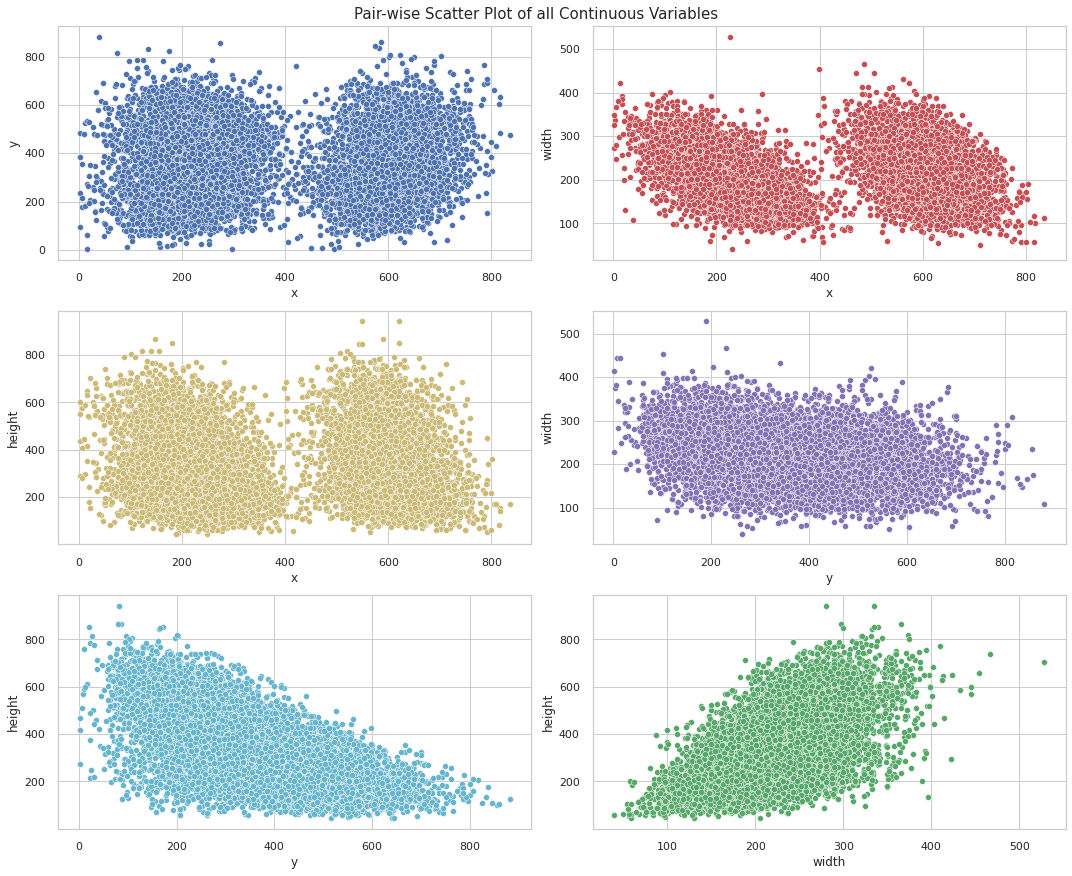

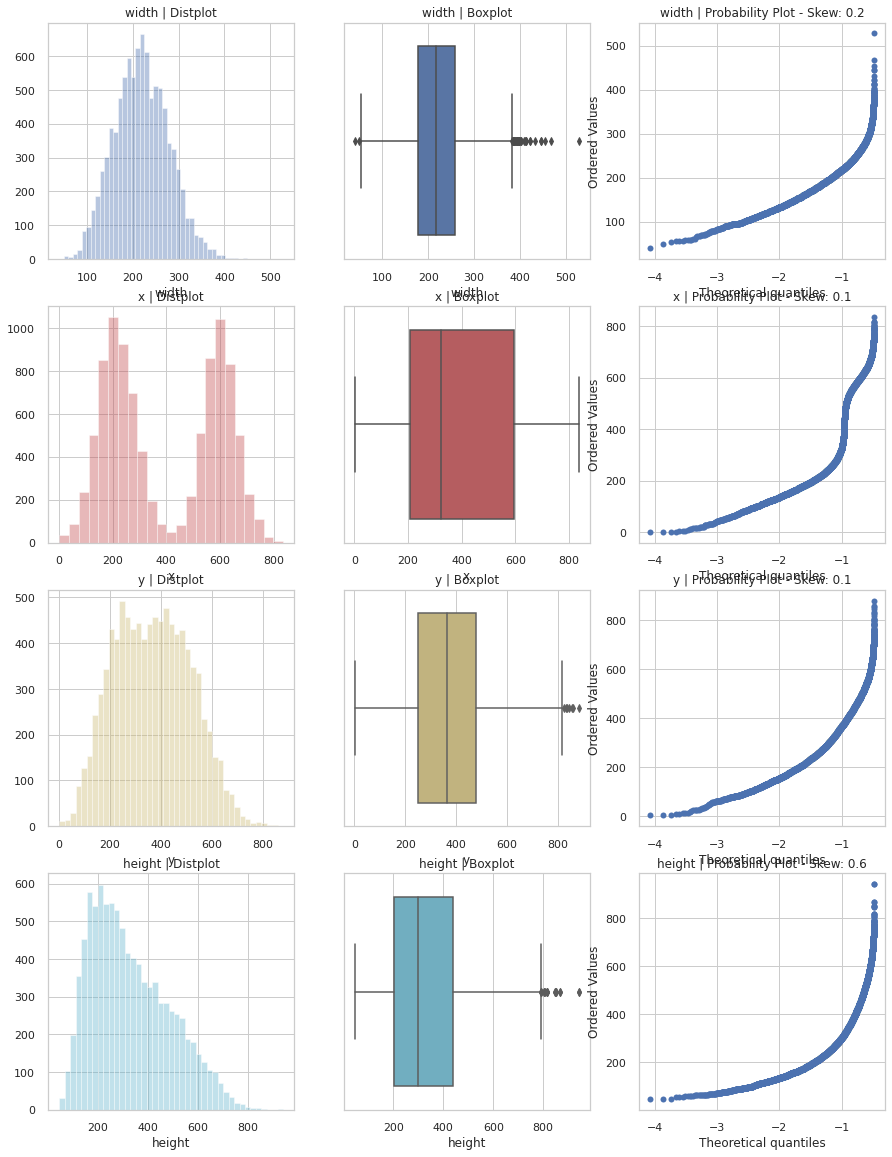

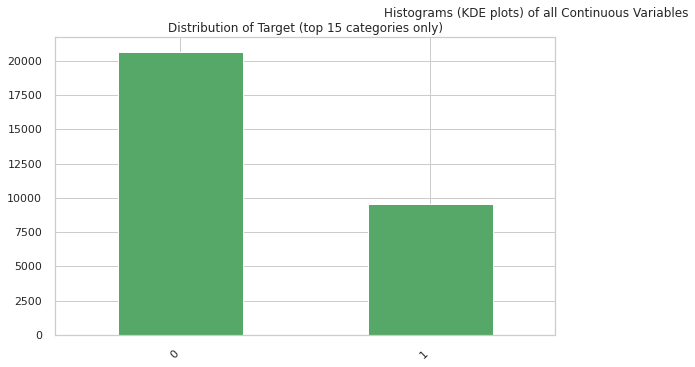

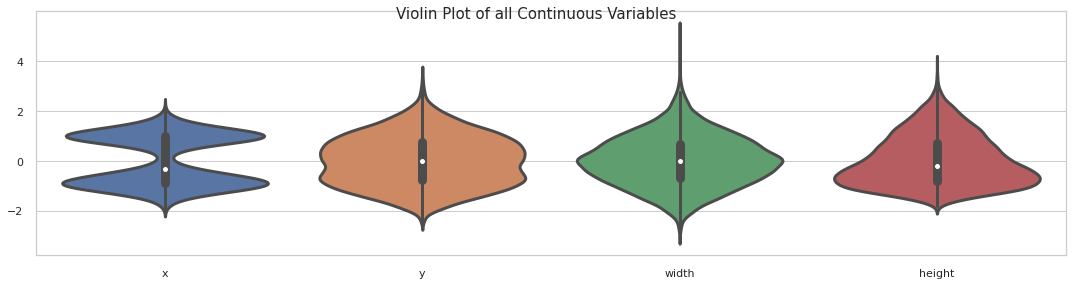

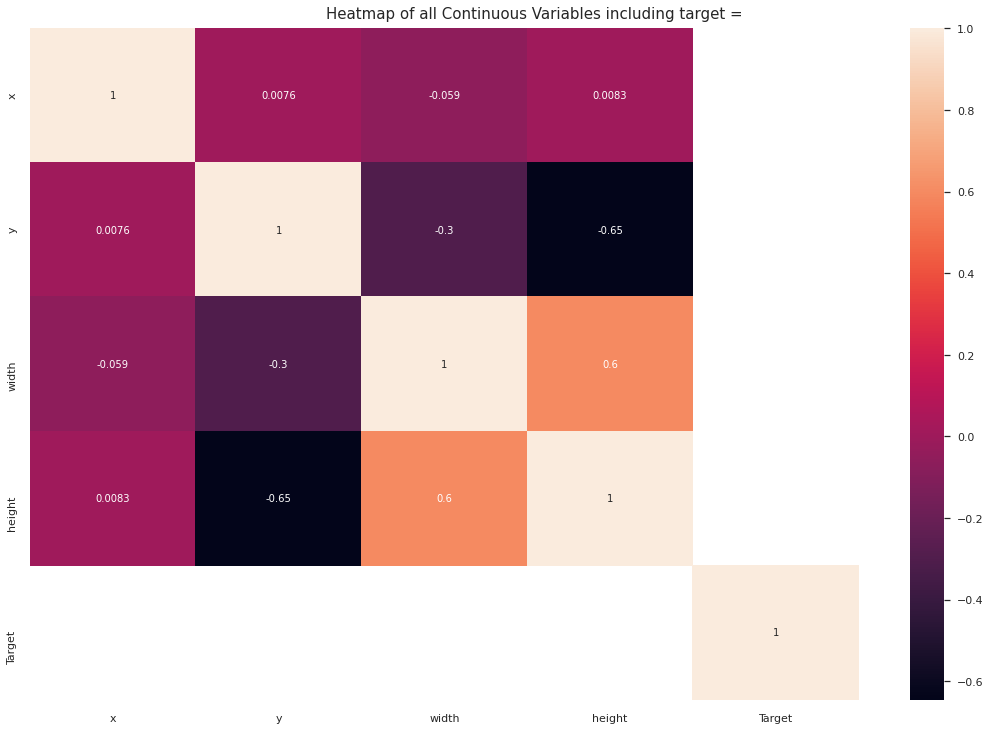

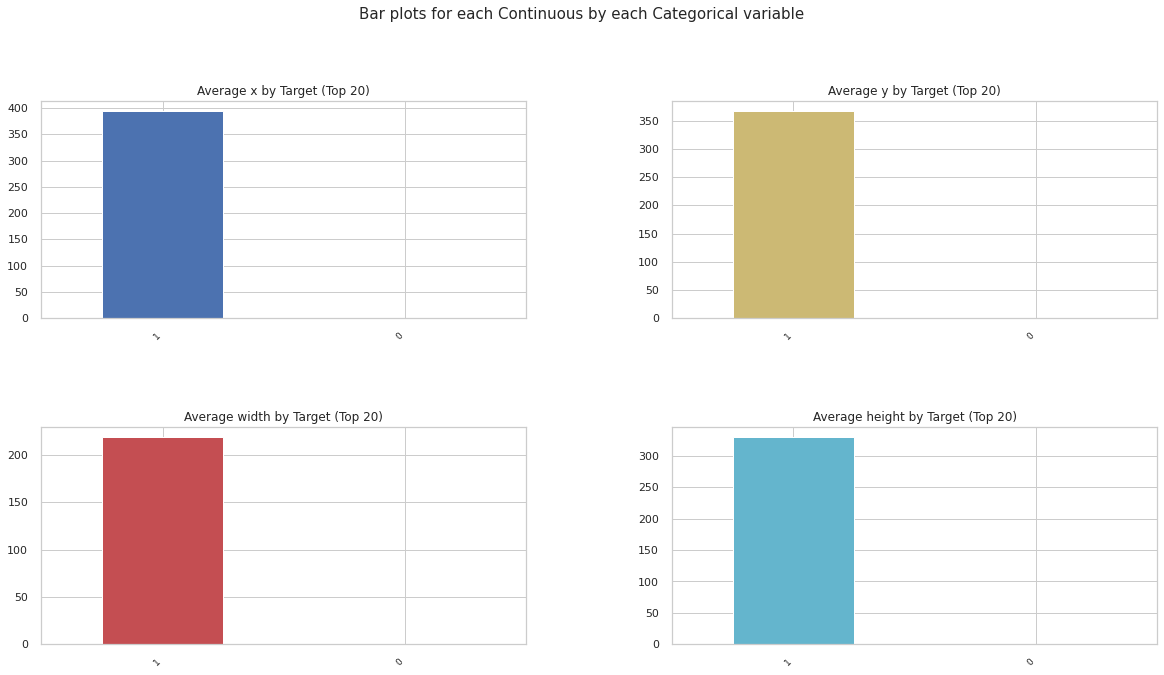

Time to run AutoViz (in seconds) = 6.263

 ###################### VISUALIZATION Completed ########################


x      y  width  height  Target
0        NaN    NaN    NaN     NaN       0
1        NaN    NaN    NaN     NaN       0
2        NaN    NaN    NaN     NaN       0
3        NaN    NaN    NaN     NaN       0
4      264.0  152.0  213.0   379.0       1
...      ...    ...    ...     ...     ...
30222  185.0  298.0  228.0   379.0       1
30223    NaN    NaN    NaN     NaN       0
30224    NaN    NaN    NaN     NaN       0
30225  570.0  393.0  261.0   345.0       1
30226  233.0  424.0  201.0   356.0       1

[30227 rows x 5 columns]

In [77]:
AV = AutoViz_Class()

AV.AutoViz('stage_2_train_labels.csv')

## **3. Model Building**

### **3.1 Building a pneumonia detection model starting from basic CNN and then improving upon it.**

In [84]:
!cp '/gdrive/My Drive/Colab Notebooks/Projects/stage_2_train_jpeg_images.zip' .
!unzip -q stage_2_train_jpeg_images.zip

In [78]:
# To reduce the complexity and computing ties we will reduce the image size to 128 as of now
image_size = 128
image_depth = 3
image_path = 'stage_2_train_jpeg_images'

In [79]:
# Sometimes(0.5, ...) applies the given augmenter in 50% of all cases,
sometimes = lambda aug: iaa.Sometimes(0.5, aug)

train_seq = iaa.Sequential([    
    #horizontal flips 50% of the time
    iaa.Fliplr(0.5),
    #Resize all images to a specific size    
    iaa.Resize({"height": image_size, "width": image_size}),
    # Make some images brighter and some darker.
    # In 20% of all cases, we sample the multiplier once per channel,
    # which can end up changing the color of the images.
    # change brightness, DOES NOT AFFECT BBs
    iaa.Multiply((1.2, 1.5), per_channel=0.2),
    # translate by 40/60px on x/y axis
    # Rotate between 25 and -25 degrees
    # THIS AFFECTs BBs
    sometimes(iaa.Affine(
        translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)},
        rotate=(-25, 25),
    ))
])

In [80]:
test_seq = iaa.Sequential([    
    #Resize all images to a specific size    
    iaa.Resize({"height": image_size, "width": image_size})
])

In [81]:
#Augmentation function to apply on a batch
def apply_aug(images, bboxes, aug_seq):
    
    #Number of images to process
    img_count = len(images)
    
    #Make sequence deterministic
    seq_det = aug_seq.to_deterministic()
    
    #Initialize boxes for all images
    boxes = []
    
    for i in range(img_count):
        
        b_box = ia.BoundingBox(x1 = bboxes[i][0],
                               y1 = bboxes[i][1],
                               x2 = bboxes[i][2],
                               y2 = bboxes[i][3])
        
        boxes.append(ia.BoundingBoxesOnImage([b_box], shape=images[i].shape))
    
    #Perform image and BBs augmentation
    image_aug = seq_det.augment_images(images)
    bbs_aug = seq_det.augment_bounding_boxes(boxes)
    
    b_images = np.zeros((img_count,image_size, image_size,image_depth))
    b_bboxes = np.zeros((img_count, 4))
    
    for i in range(img_count):
        b_images[i] = image_aug[i]
        box_new = bbs_aug[i].bounding_boxes[0]
        b_bboxes[i] = [box_new.x1,
                       box_new.y1, 
                       box_new.x2 - box_new.x1,
                       box_new.y2- box_new.y1]
    return b_images, b_bboxes

In [116]:
#Split data between train and validation set
#Get information on all images
all_images = train_df_new['patientId'].unique()
all_images.shape

(26684,)

In [117]:
#80% of the data will be used for training
mask = np.random.rand(all_images.shape[0]) < 0.8

#Get Training and Test images
train_images = all_images[mask]
test_images = all_images[~mask] 

train_images

array(['0004cfab-14fd-4e49-80ba-63a80b6bddd6',
       '00313ee0-9eaa-42f4-b0ab-c148ed3241cd',
       '00322d4d-1c29-4943-afc9-b6754be640eb', ...,
       'c1edf42b-5958-47ff-a1e7-4f23d99583ba',
       'c1f6b555-2eb1-4231-98f6-50a963976431',
       'c1f7889a-9ea9-4acb-b64c-b737c929599a'], dtype=object)

In [118]:
#Check number of images in training and test
train_images.shape, test_images.shape

((21364,), (5320,))

In [119]:
#Split dataframe between training and test
train_final = train_df_new[train_df_new['patientId'].isin(train_images)]
test_final = train_df_new[train_df_new['patientId'].isin(test_images)]

train_final = train_final.reset_index(drop=True)
test_final = test_final.reset_index(drop=True)

In [120]:
train_final

patientId  ... Target
0      0004cfab-14fd-4e49-80ba-63a80b6bddd6  ...      0
1      00313ee0-9eaa-42f4-b0ab-c148ed3241cd  ...      0
2      00322d4d-1c29-4943-afc9-b6754be640eb  ...      0
3      003d8fa0-6bf1-40ed-b54c-ac657f8495c5  ...      0
4      00569f44-917d-4c86-a842-81832af98c30  ...      0
...                                     ...  ...    ...
30119  c1f6b555-2eb1-4231-98f6-50a963976431  ...      0
30120  c1f7889a-9ea9-4acb-b64c-b737c929599a  ...      1
30121  c1f7889a-9ea9-4acb-b64c-b737c929599a  ...      1
30122  c1f7889a-9ea9-4acb-b64c-b737c929599a  ...      1
30123  c1f7889a-9ea9-4acb-b64c-b737c929599a  ...      1

[30124 rows x 7 columns]

In [121]:
def image_batch_generator(df, batch_size=32):

    while True:

        #Create indexes
        image_nums = np.random.randint(0,df.shape[0], size=batch_size)

        #Create empty arrays
        #1. To hold image input
        batch_images = np.zeros(shape=(batch_size, image_size, image_size, 3))

        #Classification Labels 
        batch_labels = np.zeros(shape=(batch_size))
        
        #Regression labels - 4 numbers per example image
        batch_bboxes = np.zeros(shape=(batch_size, 4))
        

        for i in range(batch_size):
            #Read image and resize
            img = tf.keras.preprocessing.image.load_img("stage_2_train_jpeg_images" + '/' + df.loc[image_nums[i], 'patientId'] +'.png', 
                                                        target_size=(image_size, image_size))
            
            #Conver to numpy array
            img_array = tf.keras.preprocessing.image.img_to_array(img)

            #Update batch
            batch_images[i] = img_array

            #Read image classification label & convert to one hot vector
            cl_label = df.loc[image_nums[i], 'Target']
            #cl_label = tf.keras.utils.to_categorical(cl_label, num_classes=len(num_classes))
            batch_labels[i] = cl_label

            #Read and resize bounding box co-ordinates
            img_width = df.loc[image_nums[i], 'width']
            img_height = df.loc[image_nums[i], 'height']
            
            xmin = df.loc[image_nums[i], 'x'] * image_size/img_width
            xmax = (xmin + img_width) * image_size/img_width

            ymin = df.loc[image_nums[i], 'y'] * image_size/img_height
            ymax = (ymin + img_height) * image_size/img_height

            #We will ask model to predict xmin, ymin, width and height of bounding box
            batch_bboxes[i] = [xmin, ymin, xmax-xmin, ymax-ymin]
        
        #Make bounding boxes (x, y, w, h) as numbers between 0 and 1 - this seems to work better
        batch_bboxes = batch_bboxes/image_size

        #Return batch - use yield function to make it a python generator
        yield batch_images, [batch_labels, batch_bboxes]

In [122]:
def image_batch_generator_aug(df, batch_size=32, train_mode=True):

    while True:

        #Create indexes
        image_nums = np.random.randint(0,df.shape[0], size=batch_size)

        #Create empty arrays
        #1. To hold image input
        batch_images = np.zeros(shape=(batch_size, image_size, image_size,3))

        #Classification Labels 
        batch_labels = np.zeros(shape=(batch_size))
        
        #Regression labels - 4 numbers per example image
        batch_bboxes = np.zeros(shape=(batch_size, 4))
        #List to hold all images which will be augmented
        all_images = []

        for i in range(batch_size):
            #Read image and resize
            img = tf.keras.preprocessing.image.load_img("stage_2_train_jpeg_images" + '/' + df.loc[image_nums[i], 'patientId'] +'.png', 
                                                       target_size=(image_size, image_size, 3))
            
            #Conver to numpy array
            img_array = tf.keras.preprocessing.image.img_to_array(img)            
            #ds = dicom.dcmread(image_path + '/' + df.loc[i, 'patientId']+'.dcm')
            #img_array = cv2.resize(ds.pixel_array,(64,64))
            #img_array = img_array.reshape(64,64,1)
            #Update batch
            #batch_images[i] = img_array
            all_images.append(img_array)
            #Read image classification label & convert to one hot vector
            cl_label = df.loc[image_nums[i], 'Target']
            #cl_label = tf.keras.utils.to_categorical(cl_label, num_classes=2)
            batch_labels[i] = cl_label

            #Read and resize bounding box co-ordinates
            img_width = df.loc[image_nums[i], 'width']
            img_height = df.loc[image_nums[i], 'height']
            
            xmin = df.loc[image_nums[i], 'x'] * image_size/img_width
            xmax = (xmin + img_width) * image_size/img_width

            ymin = df.loc[image_nums[i], 'y'] * image_size/img_height
            ymax = (ymin + img_height) * image_size/img_height

            #We will ask model to predict xmin, ymin, width and height of bounding box
            batch_bboxes[i] = [xmin, ymin, xmax, ymax]
        
        #Apply augmentation
        if(train_mode):
            batch_images, batch_bboxes = apply_aug(all_images, batch_bboxes, train_seq)
        else:
            batch_images, batch_bboxes = apply_aug(all_images, batch_bboxes, test_seq)

        #Make bounding boxes (x, y, w, h) as numbers between 0 and 1 - this seems to work better
        batch_bboxes = batch_bboxes/image_size

        #Return batch - use yield function to make it a python generator
        yield batch_images, [batch_labels, batch_bboxes]

In [123]:
gen = image_batch_generator(train_df_new, batch_size= 2)

In [124]:
x,y = next(gen)

In [125]:
x.shape

(2, 128, 128, 3)

In [126]:
def calculate_iou(y_true, y_pred):
    
    
    """
    Input:
    Keras provides the input as numpy arrays with shape (batch_size, num_columns).
    
    Arguments:
    y_true -- first box, numpy array with format [x, y, width, height, conf_score]
    y_pred -- second box, numpy array with format [x, y, width, height, conf_score]
    x any y are the coordinates of the top left corner of each box.
    
    Output: IoU of type float32. (This is a ratio. Max is 1. Min is 0.)
    
    """

    
    results = []
    
    for i in range(0,y_true.shape[0]):
    
        # set the types so we are sure what type we are using
        y_true = np.array(y_true, dtype=np.float32)
        y_pred = np.array(y_pred, dtype=np.float32)

        #print(y_true.shape)
        #print(y_pred.shape)
        # boxTrue
        x_boxTrue_tleft = y_true[i,0]  # numpy index selection
        y_boxTrue_tleft = y_true[i,1]
        boxTrue_width = y_true[i,2]
        boxTrue_height = y_true[i,3]
        area_boxTrue = (boxTrue_width * boxTrue_height)

        # boxPred
        x_boxPred_tleft = y_pred[i,0]
        y_boxPred_tleft = y_pred[i,1]
        boxPred_width = y_pred[i,2]
        boxPred_height = y_pred[i,3]
        area_boxPred = (boxPred_width * boxPred_height)

        # calculate the bottom right coordinates for boxTrue and boxPred

        # boxTrue
        x_boxTrue_br = x_boxTrue_tleft + boxTrue_width
        y_boxTrue_br = y_boxTrue_tleft + boxTrue_height # Version 2 revision

        # boxPred
        x_boxPred_br = x_boxPred_tleft + boxPred_width
        y_boxPred_br = y_boxPred_tleft + boxPred_height # Version 2 revision


        # calculate the top left and bottom right coordinates for the intersection box, boxInt

        # boxInt - top left coords
        x_boxInt_tleft = np.max([x_boxTrue_tleft,x_boxPred_tleft])
        y_boxInt_tleft = np.max([y_boxTrue_tleft,y_boxPred_tleft]) # Version 2 revision

        # boxInt - bottom right coords
        x_boxInt_br = np.min([x_boxTrue_br,x_boxPred_br])
        y_boxInt_br = np.min([y_boxTrue_br,y_boxPred_br]) 

        # Calculate the area of boxInt, i.e. the area of the intersection 
        # between boxTrue and boxPred.
        # The np.max() function forces the intersection area to 0 if the boxes don't overlap.
        
        
        # Version 2 revision
        area_of_intersection = \
        np.max([0,(x_boxInt_br - x_boxInt_tleft)]) * np.max([0,(y_boxInt_br - y_boxInt_tleft)])

        iou = area_of_intersection / ((area_boxTrue + area_boxPred) - area_of_intersection)


        # This must match the type used in py_func
        iou = np.array(iou, dtype=np.float32)
        
        # append the result to a list at the end of each loop
        results.append(iou)
    
    # return the mean IoU score for the batch
    return np.mean(results)



def IoU(y_true, y_pred):
    
    iou = tf.py_function(calculate_iou, [y_true, y_pred], tf.float32)

    return iou

### Build VGG CNN Model

In [127]:
#Clear any previous model from memory
tf.keras.backend.clear_session()

#Initialize model
model = tf.keras.models.Sequential()
#----------------------------------------------------------------
#normalize data
model.add(tf.keras.layers.BatchNormalization(input_shape=(image_size,image_size,3,)))

#Add Conv Layer
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3),padding='same', activation='relu'))

#normalize data
model.add(tf.keras.layers.BatchNormalization())

#Add Conv Layer
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), padding='same',activation='relu'))

#Add Max Pool layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2))
#------------------------------------------------------------------------------
#128 filters

#normalize data
model.add(tf.keras.layers.BatchNormalization())

#Add Conv Layer
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'))

#normalize data
model.add(tf.keras.layers.BatchNormalization())

#Add Conv Layer
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'))

#Add Max Pool layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))
#---------------------------------------------------------------------------

#Add Conv Layer

#normalize data
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(256, kernel_size=(3,3),padding='same', activation='relu'))

#normalize data
model.add(tf.keras.layers.BatchNormalization())
#Add Conv Layer
model.add(tf.keras.layers.Conv2D(256, kernel_size=(3,3), padding ='same',activation='relu'))
#normalize data
model.add(tf.keras.layers.BatchNormalization())
#Add Conv Layer
model.add(tf.keras.layers.Conv2D(256, kernel_size=(3,3), padding='same',activation='relu'))

#Add Max Pool layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))
#---------------------------------------------------------------------------

#normalize data
model.add(tf.keras.layers.BatchNormalization())

#Add Conv Layer
model.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3), padding='same',activation='relu'))

#normalize data
model.add(tf.keras.layers.BatchNormalization())
#Add Conv Layer
model.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3),padding='same', activation='relu'))
#normalize data
model.add(tf.keras.layers.BatchNormalization())
#Add Conv Layer
model.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3),padding='same', activation='relu'))

#Add Max Pool layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(3,3),strides=2))

#---------------------------------------------------------------------------

#normalize data
model.add(tf.keras.layers.BatchNormalization())

#Add Conv Layer
model.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3), padding='same',activation='relu'))

#normalize data
model.add(tf.keras.layers.BatchNormalization())
#Add Conv Layer
model.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3), padding='same',activation='relu'))
#normalize data
model.add(tf.keras.layers.BatchNormalization())
#Add Conv Layer
model.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3), padding='same',activation='relu'))

#Add Max Pool layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(3,3),strides=2))

#---------------------------------------------------------------------------
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(4096, activation='relu'))
#Add Dropout
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(4096, activation='relu'))
#Add Dropout
model.add(tf.keras.layers.Dropout(0.25))

last_layer = model.output

In [128]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 128, 128, 3)       12        
_________________________________________________________________
conv2d (Conv2D)              (None, 128, 128, 64)      1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 64)      256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 128)       7

In [129]:
#Classification output
label_output = tf.keras.layers.Dense(1, 
                                     activation='sigmoid', 
                                     name='class_op')(last_layer)

#Regression
bbox_output = tf.keras.layers.Dense(4, 
                                    activation='sigmoid',
                                    name='reg_op')(last_layer)


In [130]:
#Non Sequential model as it has two different outputs
final_model = tf.keras.models.Model(inputs=model.input, #Pre-trained model input as input layer
                                    outputs=[label_output,bbox_output]) #Output layer added

In [131]:
#Create train and test generator
#batchsize = 32
train_generator = image_batch_generator(train_final) #batchsize can be changed
test_generator = image_batch_generator(test_final)

In [132]:
X, y = next(train_generator)
print(X.shape)

(32, 128, 128, 3)


In [133]:
final_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
batch_normalization_input (Inpu [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 128, 128, 3)  12          batch_normalization_input[0][0]  
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 64) 1792        batch_normalization[0][0]        
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 128, 128, 64) 256         conv2d[0][0]                     
______________________________________________________________________________________________

In [134]:
#Saving the best model using model checkpoint callback
model_checkpoint=tf.keras.callbacks.ModelCheckpoint('Pneumonia_detection_vgg.h5',
                                                    save_best_only=True, 
                                                    monitor='val_class_op_accuracy', 
                                                    mode='max',
                                                    verbose=1)

In [135]:
final_model.compile(optimizer='adam', 
                    loss={'reg_op':'mse', 'class_op':'binary_crossentropy'},
                    loss_weights={'reg_op':1, 'class_op':1},
                    metrics={'reg_op':[IoU], 'class_op':['accuracy']})

In [136]:
final_model.fit(train_generator,
                epochs=10,
                steps_per_epoch= train_final.shape[0]//32,
                validation_data=test_generator,
                validation_steps = test_final.shape[0]//32,
                callbacks=model_checkpoint)

Epoch 1/10
941/941 [==============================] - 188s 183ms/step - loss: 1.6211 - class_op_loss: 0.8034 - reg_op_loss: 0.8177 - class_op_accuracy: 0.7433 - reg_op_IoU: 0.0126 - val_loss: 1.4378 - val_class_op_loss: 0.6161 - val_reg_op_loss: 0.8217 - val_class_op_accuracy: 0.7049 - val_reg_op_IoU: 0.0111

Epoch 00001: val_class_op_accuracy improved from -inf to 0.70486, saving model to Pneumonia_detection_vgg.h5
Epoch 2/10
941/941 [==============================] - 170s 181ms/step - loss: 1.2945 - class_op_loss: 0.4884 - reg_op_loss: 0.8062 - class_op_accuracy: 0.7765 - reg_op_IoU: 0.0121 - val_loss: 1.3681 - val_class_op_loss: 0.5286 - val_reg_op_loss: 0.8396 - val_class_op_accuracy: 0.7423 - val_reg_op_IoU: 0.0128

Epoch 00002: val_class_op_accuracy improved from 0.70486 to 0.74225, saving model to Pneumonia_detection_vgg.h5
Epoch 3/10
941/941 [==============================] - 170s 181ms/step - loss: 1.2506 - class_op_loss: 0.4688 - reg_op_loss: 0.7818 - class_op_accuracy: 0.793

### observations
1. The model has too many trainable weights due to many layers and might lead to more computations causing the execution delay,  and the weights will change based on our image size.
2. Initial model is slightly overfitting, where we can see the class accuracy is little high than the validation set accuracy.
3. But we can also see there is constant improvement in classification accuracy aswell as regression accuracy.
4. Running the model for onnly 10 epochs now, if we increase the epoch count then we may see more improvement.
5. We can later on incorporate image augmentation on the data set.

**THE HIGHEST ACCURACY AFTER 10 EPOCHS IS = 80.50**

In [137]:
final_model.save('Pneumonia_detection_manual_vgg16.h5')

# Simple CNN model


In [138]:
simpmodel = tf.keras.models.Sequential()
simpmodel.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu',input_shape=(image_size,image_size,3)))
simpmodel.add(tf.keras.layers.Conv2D(64,(5,5),activation='relu'))# hidden layer-1
simpmodel.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
simpmodel.add(tf.keras.layers.Dropout(0.5))
simpmodel.add(tf.keras.layers.Conv2D(64,(5,5),activation='relu')) # hidden layer -2
simpmodel.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
simpmodel.add(tf.keras.layers.Dropout(0.3))
simpmodel.add(tf.keras.layers.Conv2D(128,(5,5),activation='relu'))# hidden layer -3
simpmodel.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
simpmodel.add(tf.keras.layers.Dropout(0.2))
simpmodel.add(tf.keras.layers.Flatten()) # flatten
simpmodel.add(tf.keras.layers.Dense(64,activation='relu'))# fully connected layer
simpmodel.add(tf.keras.layers.Dropout(0.3))
simpmodel.add(tf.keras.layers.Dense(100))
simpmodel.add(tf.keras.layers.BatchNormalization())
simpmodel.add(tf.keras.layers.Activation('relu'))
simpmodel.add(tf.keras.layers.Dense(1))
simpmodel.add(tf.keras.layers.Activation('relu'))
last_layer = simpmodel.output

In [139]:
simpmodel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 122, 122, 64)      51264     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 61, 61, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 61, 61, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 57, 57, 64)        102464    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 28, 28, 64)       

In [140]:
#Classification output
label_output = tf.keras.layers.Dense(1, 
                                     activation='sigmoid', 
                                     name='class_op')(last_layer)

#Regression
bbox_output = tf.keras.layers.Dense(4, 
                                    activation='sigmoid',
                                    name='reg_op')(last_layer)


In [141]:
#Non Sequential model as it has two different outputs
simpmodel_final = tf.keras.models.Model(inputs=simpmodel.input, #Pre-trained model input as input layer
                                    outputs=[label_output,bbox_output]) #Output layer added

In [142]:
#Create train and test generator
#batchsize = 32
train_generator = image_batch_generator(train_final) #batchsize can be changed
test_generator = image_batch_generator(test_final)

In [143]:
#Saving the best model using model checkpoint callback
model_checkpoint=tf.keras.callbacks.ModelCheckpoint('Pneumonia_detection_simple.h5',
                                                    save_best_only=True, 
                                                    monitor='val_class_op_accuracy', 
                                                    mode='max',
                                                    verbose=1)

In [144]:
simpmodel_final.compile(optimizer='adam', 
                    loss={'reg_op':'mse', 'class_op':'binary_crossentropy'},
                    loss_weights={'reg_op':1, 'class_op':1},
                    metrics={'reg_op':[IoU], 'class_op':['accuracy']})

In [145]:
simpmodel_final.fit(train_generator,
                epochs=10,
                steps_per_epoch= train_final.shape[0]//32,
                validation_data=test_generator,
                validation_steps = test_final.shape[0]//32,
                callbacks=model_checkpoint)

Epoch 1/10
941/941 [==============================] - 68s 70ms/step - loss: 1.5009 - class_op_loss: 0.6433 - reg_op_loss: 0.8576 - class_op_accuracy: 0.6671 - reg_op_IoU: 0.0045 - val_loss: 1.3862 - val_class_op_loss: 0.5853 - val_reg_op_loss: 0.8009 - val_class_op_accuracy: 0.7415 - val_reg_op_IoU: 0.0050

Epoch 00001: val_class_op_accuracy improved from -inf to 0.74145, saving model to Pneumonia_detection_simple.h5
Epoch 2/10
941/941 [==============================] - 65s 69ms/step - loss: 1.3772 - class_op_loss: 0.5602 - reg_op_loss: 0.8170 - class_op_accuracy: 0.7505 - reg_op_IoU: 0.0133 - val_loss: 1.3797 - val_class_op_loss: 0.5744 - val_reg_op_loss: 0.8052 - val_class_op_accuracy: 0.7386 - val_reg_op_IoU: 0.0139

Epoch 00002: val_class_op_accuracy did not improve from 0.74145
Epoch 3/10
941/941 [==============================] - 65s 69ms/step - loss: 1.3138 - class_op_loss: 0.5264 - reg_op_loss: 0.7873 - class_op_accuracy: 0.7649 - reg_op_IoU: 0.0128 - val_loss: 1.3405 - val_cla

SImple model has overfitting issues, where in some epoch we can see high difference between train and test accuracy

The highest accuracy we got here is 74.5